# Fragilities in the Capacity Expansion Model

Text(127.0, 1.1, 'Hurricane category (ASCE 7- Wind Speed Over Land)')

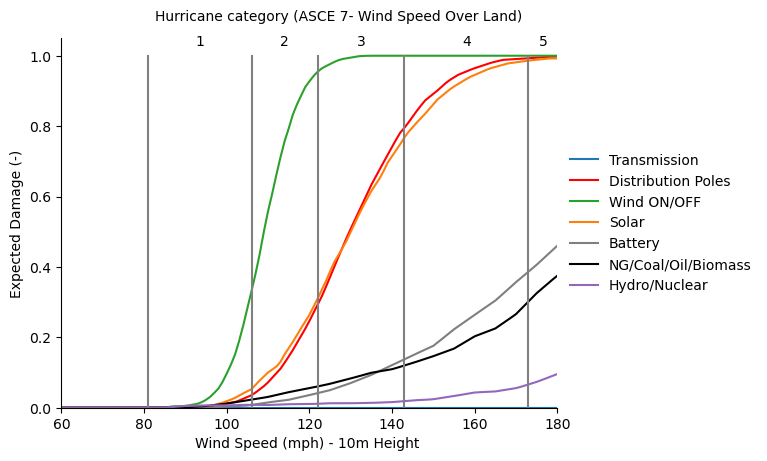

In [30]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from fragility_curves_2023 import fragility



# =============================================================================#
# Select Fragility Curves
# =============================================================================#

#curve name, curve code, curve color, curve line style
curves = {"Transmission": ["NotAffected","tab:blue","-"],
          "Distribution Poles": ["DistributionPole_Wood_Salmana","red","-"],
          "Wind ON/OFF": ["wind_AVG_CAMPO_MIGUEL","tab:green","-"],
          "Solar": ["solar_Kabre","tab:orange","-"],
          "Battery": ["SECBL","tab:gray","-"],
          "NG/Coal/Oil/Biomass": ["SECBM","black","-"],
          "Hydro/Nuclear": ["CECBM","tab:purple","-"],
}


mph = np.arange(0, 200, 1)

# ================================#
# Plot - Compare Used Damage Functions
# ================================#

ax = plt.subplot(111)

for keys_name in curves.keys():
    curve_name=curves[keys_name][0]
    curve_color = curves[keys_name][1]
    line_style = curves[keys_name][2]
    damage=fragility(mph, curve=curve_name)
    ax.plot(mph, damage, curve_color,linestyle=line_style, label=keys_name)

plt.ylabel("Expected Damage (-)")
plt.xlabel("Wind Speed (mph) - 10m Height ")
plt.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', ncol=1, frameon=False)


ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=1.05)
ax.set_xlim(xmin=60)
ax.set_xlim(xmax=180)
# Add vertical lines for category cases
y = [0, 1.0]
cat1 = 81
cat2 = 106
cat3 = 122
cat4 = 143
cat5 = 173

plt.plot([cat1, cat1], y, color="gray")
plt.plot([cat2, cat2], y, color="gray")
plt.plot([cat3, cat3], y, color="gray")
plt.plot([cat4, cat4], y, color="gray")
plt.plot([cat5, cat5], y, color="gray")

y_txt = 1.03
plt.text((cat1 + cat2) / 2.0, y_txt, "1", ha="center")
plt.text((cat2 + cat3) / 2.0, y_txt, "2", ha="center")
plt.text((cat3 + cat4) / 2.0, y_txt, "3", ha="center")
plt.text((cat4 + cat5) / 2.0, y_txt,"4", ha="center")
plt.text((cat5+180)/2, y_txt, "5", ha="center")
plt.text((cat1 + cat5) / 2.0, y_txt + 0.07, "Hurricane category (ASCE 7- Wind Speed Over Land)", ha="center")

#plt.savefig('./Figures/fragility_curves.png', dpi=600, bbox_inches="tight")


# Fragility in Generation Tech

Text(127.0, 1.1, 'Hurricane category (ASCE 7- Wind Speed Over Land)')

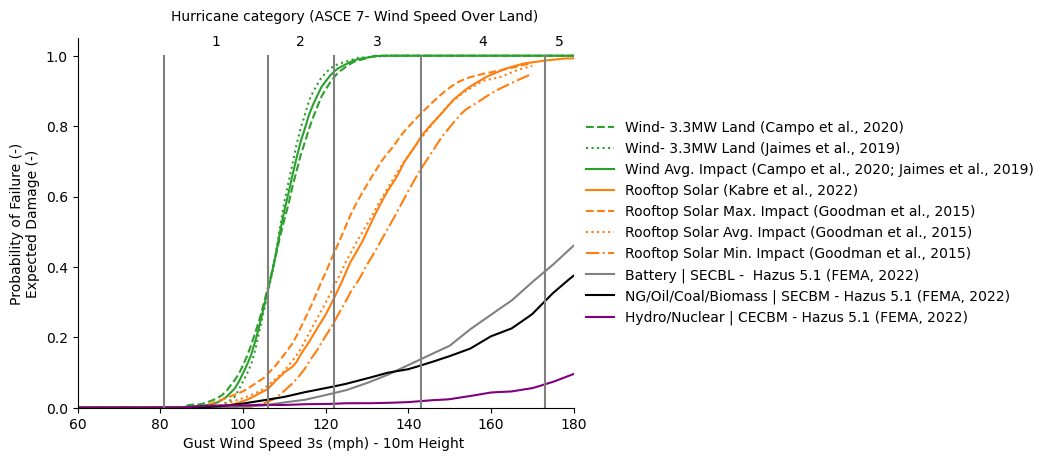

In [31]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fragility_curves_2023 import fragility



# =============================================================================#
# Select Fragility Curves
# =============================================================================#

curves_Wind = {
          "Wind- 3.3MW Land (Campo et al., 2020)": ["wind_land_NoDamping_Campo","tab:green","--"],
          "Wind- 3.3MW Land (Jaimes et al., 2019)": ["wind_land_Miguel","tab:green",":"],
          "Wind Avg. Impact (Campo et al., 2020; Jaimes et al., 2019)":["wind_AVG_CAMPO_MIGUEL","tab:green","-"],
          "Rooftop Solar (Kabre et al., 2022)": ["solar_Kabre","tab:orange","-"],
          "Rooftop Solar Max. Impact (Goodman et al., 2015)": ["solar_Goodman_max_impact","tab:orange","--"],
          "Rooftop Solar Avg. Impact (Goodman et al., 2015)": ["solar_Goodman_18_102_U_15","tab:orange",":"],
          "Rooftop Solar Min. Impact (Goodman et al., 2015)": ["solar_Goodman_min_impact","tab:orange","dashdot"],
          "Battery | SECBL -  Hazus 5.1 (FEMA, 2022)": ["SECBL","gray","-"],#Battery           
          "NG/Oil/Coal/Biomass | SECBM - Hazus 5.1 (FEMA, 2022)": ["SECBM","black","-"],#NG
          "Hydro/Nuclear | CECBM - Hazus 5.1 (FEMA, 2022)": ["CECBM","purple","-"], #HYDRO    
          }
curves=curves_Wind
mph = np.arange(0, 200, 1)

# ================================#
# Plot - Compare Used Damage Functions
# ================================#

ax = plt.subplot(111)

for keys_name in curves.keys():
    curve_name=curves[keys_name][0]
    curve_color = curves[keys_name][1]
    line_style = curves[keys_name][2]
    damage=fragility(mph, curve=curve_name)
    ax.plot(mph, damage, curve_color,linestyle=line_style, label=keys_name)

plt.ylabel("Probability of Failure (-)\nExpected Damage (-)")
plt.xlabel("Gust Wind Speed 3s (mph) - 10m Height ")
#plt.legend(bbox_to_anchor=(0.5, 0.1), loc='center left', ncol=1, frameon=True)
plt.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', ncol=1, frameon=False)


ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=1.05)
ax.set_xlim(xmin=60)
ax.set_xlim(xmax=180)
# Add vertical lines for category cases
#used ASCE 7 for wind over water (Gust wind different from sustained wind)
y = [0, 1.0]
cat1 = 81
cat2 = 106
cat3 = 122
cat4 = 143
cat5 = 173

plt.plot([cat1, cat1], y, color="gray")
plt.plot([cat2, cat2], y, color="gray")
plt.plot([cat3, cat3], y, color="gray")
plt.plot([cat4, cat4], y, color="gray")
plt.plot([cat5, cat5], y, color="gray")

y_txt = 1.03
plt.text((cat1 + cat2) / 2.0, y_txt, "1", ha="center")
plt.text((cat2 + cat3) / 2.0, y_txt, "2", ha="center")
plt.text((cat3 + cat4) / 2.0, y_txt, "3", ha="center")
plt.text((cat4 + cat5) / 2.0, y_txt,"4", ha="center")
plt.text((cat5+180)/2, y_txt, "5", ha="center")
plt.text((cat1 + cat5) / 2.0, y_txt + 0.07, "Hurricane category (ASCE 7- Wind Speed Over Land)", ha="center")

#plt.savefig('./Figures/Fragility_References.png', dpi=600, bbox_inches="tight")


# Check Fragility in Distribution

Text(127.0, 1.1, 'Hurricane category (ASCE 7- Wind Speed Over Land)')

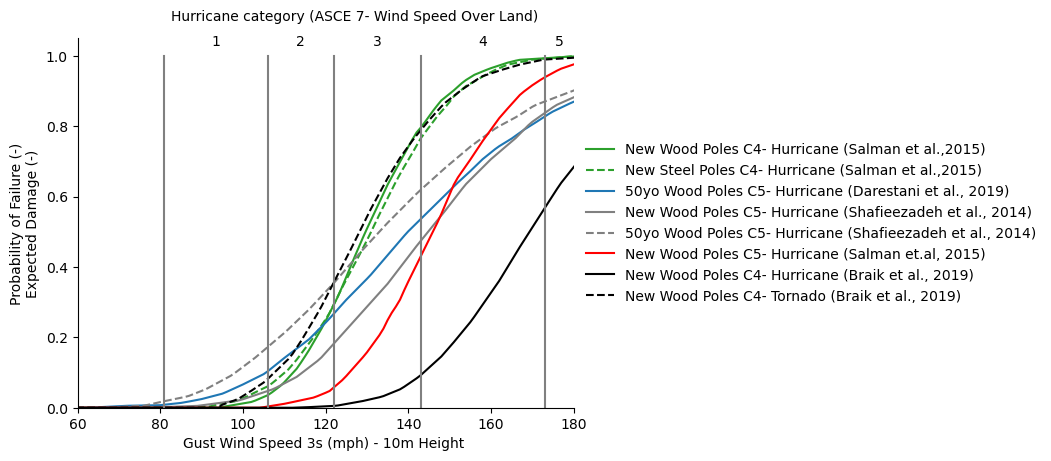

In [32]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fragility_curves_2023 import fragility



# =============================================================================#
# Select Fragility Curves
# =============================================================================#

curves_Wind = {
          "New Wood Poles C4- Hurricane (Salman et al.,2015)": ["DistributionPole_Wood_Salmana","tab:green","-"],
          "New Steel Poles C4- Hurricane (Salman et al.,2015)": ["DistributionPole_Steel_Salmana","tab:green","--"],
         "50yo Wood Poles C5- Hurricane (Darestani et al., 2019)":["Distribution_Poles_Darestani_C5","tab:blue","-"],
           "New Wood Poles C5- Hurricane (Shafieezadeh et al., 2014)": ["Distribution_Wood_PolesNew_Shafieezadeh_C5","gray","-"],#Battery           
           "50yo Wood Poles C5- Hurricane (Shafieezadeh et al., 2014)": ["Distribution_Wood_Poles50yo_Shafieezadeh_C5","gray","--"],
           "New Wood Poles C5- Hurricane (Salman et.al, 2015)": ["Distribution_Poles_Salman","red","-"],#
            "New Wood Poles C4- Hurricane (Braik et al., 2019)": ["DistributionPoles_Hurricane_Braik","black","-"],#
           "New Wood Poles C4- Tornado (Braik et al., 2019)": ["DistributionPoles_Tornado_Braik","black","--"],#
          }


curves=curves_Wind
mph = np.arange(0, 200, 1)

# ================================# 
# Plot - Compare Used Damage Functions
# ================================#

ax = plt.subplot(111)

for keys_name in curves.keys():
    curve_name=curves[keys_name][0]
    curve_color = curves[keys_name][1]
    line_style = curves[keys_name][2]
    damage=fragility(mph, curve=curve_name)
    ax.plot(mph, damage, curve_color,linestyle=line_style, label=keys_name)

plt.ylabel("Probability of Failure (-)\nExpected Damage (-)")
plt.xlabel("Gust Wind Speed 3s (mph) - 10m Height ")
#plt.legend(bbox_to_anchor=(0.5, 0.1), loc='center left', ncol=1, frameon=True)
plt.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', ncol=1, frameon=False)


ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=1.05)
ax.set_xlim(xmin=60)
ax.set_xlim(xmax=180)
# Add vertical lines for category cases
y = [0, 1.0]
cat1 = 81
cat2 = 106
cat3 = 122
cat4 = 143
cat5 = 173

plt.plot([cat1, cat1], y, color="gray")
plt.plot([cat2, cat2], y, color="gray")
plt.plot([cat3, cat3], y, color="gray")
plt.plot([cat4, cat4], y, color="gray")
plt.plot([cat5, cat5], y, color="gray")

y_txt = 1.03
plt.text((cat1 + cat2) / 2.0, y_txt, "1", ha="center")
plt.text((cat2 + cat3) / 2.0, y_txt, "2", ha="center")
plt.text((cat3 + cat4) / 2.0, y_txt, "3", ha="center")
plt.text((cat4 + cat5) / 2.0, y_txt,"4", ha="center")
plt.text((cat5+180)/2, y_txt, "5", ha="center")
plt.text((cat1 + cat5) / 2.0, y_txt + 0.07, "Hurricane category (ASCE 7- Wind Speed Over Land)", ha="center")

# Check Fragility in Transmission